# Lecture Five - June 20th 2017


* Talk about the assignment
* Introduction to data visulization with `matplotlib`
* Talk about final project with Public Source

## Assignment Two - Data Manipulation

This assignment has four data manipulation tasks:
* Loading Data - Open multiple data files as Pandas Dataframes
* Documenting Data - Inspect the dataframes and describe the types of data and their relations
* Cleaning Data - Normalize values in the data so you can group things
* Combining Data - Join the data across each of the dataframes to create a view a part of the whole

The assignment is designed around the [menu data](http://menus.nypl.org/data) from the [What's on the Menu](http://menus.nypl.org/). That said, if there is another dataset you'd like to use, please come talk to me.

* Any questions about the assignment?



### Downloading the data

* Download it directly to the Jupyterhub using the `!wget` command
* You will get a `.tgz` file, what is that?! It is a "gzipped tarball" (huh?)
* Unzip it using `!tar -xvf` command
* We use the `!` to run a linux command in the notebook

In [1]:
!wget https://s3.amazonaws.com/menusdata.nypl.org/gzips/2017_06_16_07_01_05_data.tgz

--2017-06-20 12:18:40--  https://s3.amazonaws.com/menusdata.nypl.org/gzips/2017_06_16_07_01_05_data.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.82.250
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.82.250|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36443356 (35M) [text/csv]
Saving to: ‘2017_06_16_07_01_05_data.tgz’

2017_06_16_07_01_05 100%[===================>]  34.75M  2.46MB/s    in 15s     

2017-06-20 12:18:55 (2.36 MB/s) - ‘2017_06_16_07_01_05_data.tgz’ saved [36443356/36443356]



In [2]:
!ls -lh

total 44M
-rw-rw-r-- 1 jason jason 862K Jun 13 13:50 2016-09-02.csv
-rw-rw-r-- 1 jason jason 862K Jun 13 13:52 2016-09-02.csv.1
-rw-rw-r-- 1 jason jason  35M Jun 16 03:09 2017_06_16_07_01_05_data.tgz
-rw-rw-r-- 1 jason jason 2.9K Jun  3 11:04 Colditz_L2_Hw.ipynb
-rw-rw-r-- 1 jason jason  28K Jun 20 12:17 Lecture Five June 20th.ipynb
-rw-rw-r-- 1 jason jason 298K Jun 13 14:56 Lecture Four June 13th.ipynb
-rw-rw-r-- 1 jason jason 309K Jun 13 12:01 Lecture Three June 6th_2.ipynb
-rw-rw-r-- 1 jason jason  81K Jun  6 15:01 Lecture Three June 6th.ipynb
-rw-rw-r-- 1 jason jason  48K Jun  3 09:55 LectureTwoMay30th_v2.ipynb
-rw-rw-r-- 1 jason jason  71K Jun  3 10:42 Lecture+Two+May+30th+with+exercise.ipynb
-rw-rw-r-- 1 jason jason  93K Jun  1 20:59 mbox-short.txt
-rw-rw-r-- 1 jason jason 6.4M Dec 12  2016 mbox.txt
-rw-rw-r-- 1 jason jason 1.3K Jun  6 14:38 parsed-emails.csv
-rw-rw-r-- 1 jason jason   82 Jun  1 20:59 README.md


In [5]:
!tar -xvf 2017_06_16_07_01_05_data.tgz

Dish.csv
Menu.csv
MenuItem.csv
MenuPage.csv


In [9]:
!ls -lh | grep .csv

-rw-rw-r-- 1 jason jason 862K Jun 13 13:50 2016-09-02.csv
-rw-rw-r-- 1 jason jason 862K Jun 13 13:52 2016-09-02.csv.1
-rw------- 1 jason jason  26M Jun 16 03:09 Dish.csv
-rw------- 1 jason jason 3.1M Jun 16 03:02 Menu.csv
-rw------- 1 jason jason 113M Jun 16 03:08 MenuItem.csv
-rw------- 1 jason jason 4.5M Jun 16 03:02 MenuPage.csv
-rw-rw-r-- 1 jason jason 1.3K Jun  6 14:38 parsed-emails.csv


In [10]:
import seaborn


## Visualizing data


* I assume you already know what data visualization *is*
* The *real* question is *how* to visualize data AND *what* visualization to use
* There are many different kinds of data visualizations and which one is the best for any given situation is a loaded question, there are many white men with opinions
* *pass around Tufte book*

![XKCD comic on data vis](https://imgs.xkcd.com/comics/self_description.png)

### What kinds of visulizations are there?
* *pass around Knowledge is Beautiful and Dear Data*
* Here is a semy ugly looking periodic table of visualization methods: [http://www.visual-literacy.org/periodic_table/periodic_table.html](http://www.visual-literacy.org/periodic_table/periodic_table.html)
* Here is a good website cataloguing many of the different types of visualizations: [http://www.datavizcatalogue.com](http://www.datavizcatalogue.com)
* For example, here is the information about [box charts](http://www.datavizcatalogue.com/methods/bar_chart.html)
* When making a data visualization, you need to consider how various visual elements can convey the information you wish to show.
* There are many ways to represent quantiative information visually




![data-viz.jpeg](http://proquest.safaribooksonline.com/getfile?item=YzdkNC8xc210LzRlc2k5OXAvMGdzMjMzODBhYTRydDVlLmdwZy9nY2EwL2lyaXMwMnBmaGpz)

### Visualizing Data

In [11]:
# load up our python libraries
# all will be explained later
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

data = np.random.randn(1000)

### Univariate or one dimensional data

* Histograms are useful because they show you how the values are distributed
* Not to be confused with bar charts!

(array([  17.,   42.,  132.,  176.,  238.,  195.,  119.,   53.,   24.,    4.]),
 array([-2.61440084, -2.04416583, -1.47393081, -0.9036958 , -0.33346079,
         0.23677422,  0.80700924,  1.37724425,  1.94747926,  2.51771427,
         3.08794929]),
 <a list of 10 Patch objects>)

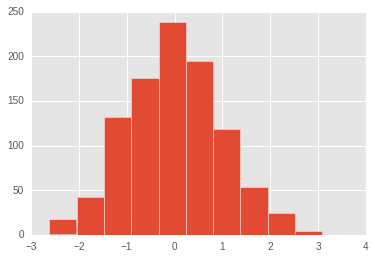

In [12]:
# create a histogram of the data
plt.hist(data)

### Bivariate or two dimensional data

* Scatter plots are useful for visualizing two dimensional numerical data

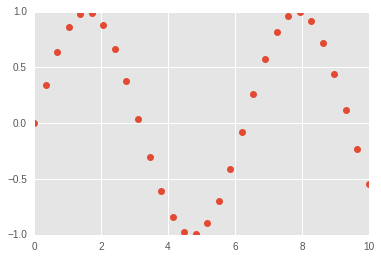

In [13]:
# create two lists of numerical data
x = np.linspace(0, 10, 30)
y = np.sin(x)

# plot the data as a series of points
plt.plot(x, y, 'o');

* Bar charts are useful for visualizing two dimensional data where one dimension is categorical

([<matplotlib.axis.XTick at 0xad43faec>,
 <a list of 4 Text xticklabel objects>)

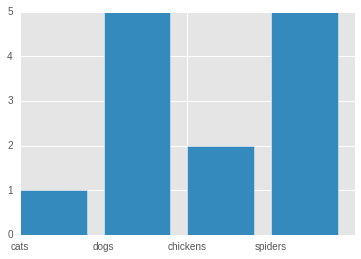

In [14]:
# create some categorical data
labels = ["cats", "dogs", "chickens", "spiders"]
x_pos = [1,2,3,4]
y = [1,5,2,5]

# plot as a bar chart
plt.bar(x_pos, y)
plt.xticks(x_pos, labels)

* And line charts can be used to represent continuous data

In [ ]:
plt.plot(x, np.sin(x));

* So this plot has two dimensions
* How might we add more?

### Adding more dimensions?

* What if we want to visualize additional dimensions? 
* Color, size, and shapes add information from other dimensions

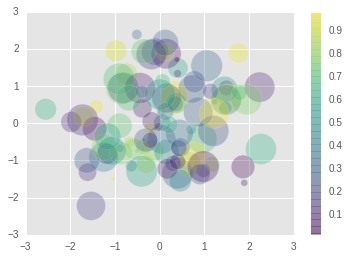

In [15]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis') # alpha controls transparency
plt.colorbar();  # show color scale

* How many dimensions are we displaying in this visualization?

## Visualization with `matplotlib` 

* matplotlib is a very powerful data visualization toolkit for Python
* But it is a bit clunky and old school
* Increasingly there are newer alternatives to graphing in Python
    * [Bokeh](http://bokeh.pydata.org/en/latest/), which is great for displaying data on the web
    * [Plotly](https://plot.ly/python/), which is a whole subscription based web service
    * [ggplot](http://ggplot.yhathq.com), a python implementation of the very popular visualization library for R
    * [Altair](https://altair-viz.github.io), which is a new *declarative* visualization library from one of the Jupyter developers
* Still, `matplotlib` is the OG of the python data visualization libraries (respect), so we are going to spend the next couple hours getting matplotlib'd



### Interacting with `matplotlib`

* Two interfaces (or "data structures" to be consistent with how we've been talking in class)
    * `pyplot` - which is designed to resemble the *not pythonic* plotting interface of MATLAB
    * The "object oriented" and more *pythonic* interfaces, consisting of 
        * `Figure` - a "data structure" that contains the figure. Has parameters and methods for setting the physical size of the visualzations, saving the visualization as an image to disk, etc. Usually stored in the `fig` variable.
        * `Axes` - a "data structure" that contains the specific elements of the visualization. You can have more than one axes if you want to create parallel plots. Has parameters and methods for setting the tick marks, legend, axis labels, etc. Usually stored in the `ax` variable.

### `matplotlib` and Jupyter Notebooks

* In order to use `matplotlib` with Jupyter Notebooks, you need to run this "magic" command
* This tells matplotlib to render the plots inside the notebook

In [16]:
%matplotlib inline

* The convention is to import the pyplot interface as `plt`

In [17]:
import matplotlib.pyplot as plt

* Now whenever you want to create a data vizualization, you will methods part of the `plt` "data structure"

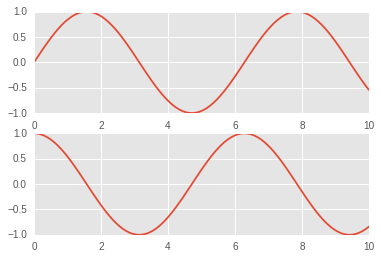

In [18]:
# Create some random data
x = np.linspace(0, 10, 100)

plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

* Even if you use the other interface to build your viz, you start with `plt`
* This set of commands creates the same viz as above, but in a differet way

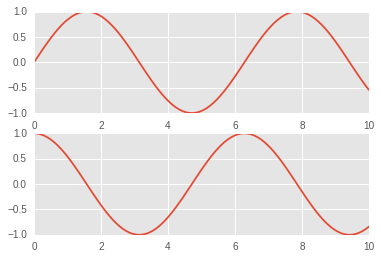

In [19]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

* The `pyplot` or `plt` interface is a bit easier to use, but you'll need to use the object oriented interface for doing fancy things.
* In practice, it is best to use a mix of both

## Visualization with `matplotlib` with `pandas`

* As an alternative to the `pyplot` or the object oriented interface, you can plot directly from `pandas` data structures
* Pandas [has its own interface](https://pandas.pydata.org/pandas-docs/stable/visualization.html#) to matplotlib tied directly to the `Series` and `Dataframe` data structures
* I find this to be the most useful mechanism for visualizing data, but 

In [20]:
# import pandas so we can panda
import pandas as pd

* Let's re-create the sin, cosine sub plot from earlier but from a Pandas dataframe

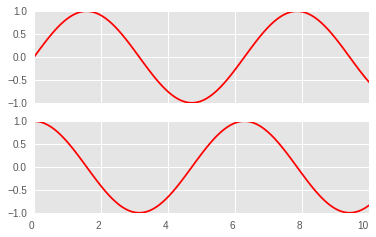

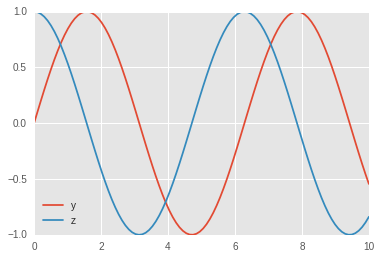

In [23]:
# create some random data
x = np.linspace(0, 10, 100)
# put that data into a dataframe
df = pd.DataFrame({"y":np.sin(x), "z":np.cos(x)}, index=x)

# Plot the data using the plot method
df.plot(subplots=True, legend=False, color=['red','red'], rot=0)
df.plot()


* Basically, you can add a `.plot()` to the end of any Pandas datastructure and it will make a best guess as to the best way to visualize it.

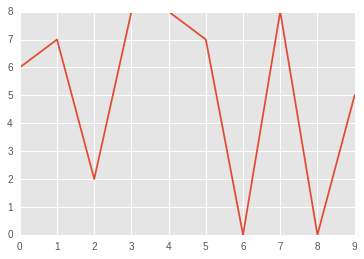

In [29]:
# Plot data in a Series with the plot method
pd.Series(np.random.randint(0,10,10)).plot()

* However, be careful calling `.plot()` all willy nilly since it doesn't always produce sensible results

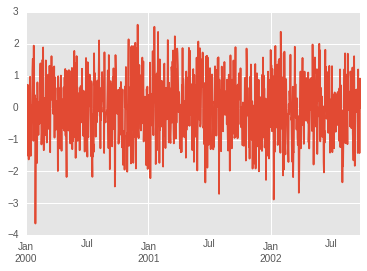

In [30]:
# create some random time series data and create a default plot
random_series = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
random_series.plot()

* What is cool is you can often use the `.plot()` method after performing some computation on the data
* For example, we can calculate the [cumulative sum](http://www.variation.com/cpa/help/hs108.htm) (the cumulative sum of differences between the values and the average)
    * Sloping up means above average, sloping down means below average

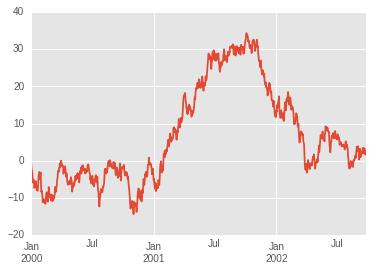

In [31]:
# Plot the cumulative sum of a Series
random_series.cumsum().plot()

* The `.plot()` trick also works with Dataframes

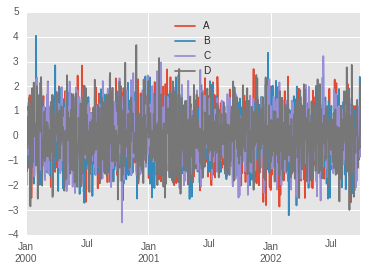

In [32]:
# create dataframe with four columns and create a default plot
df = pd.DataFrame(np.random.randn(1000, 4), index=random_series.index, columns=list('ABCD'))
df.plot()

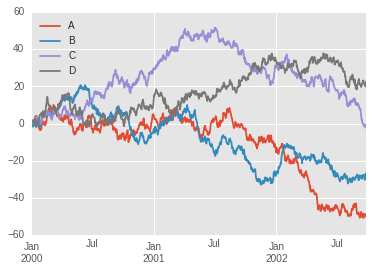

In [33]:
# Plot the cumulative sum of each column
df.cumsum().plot()

* With pandas you can specify the kind of visualization with the `kind` parameter to `plot()`
* The default isn't always what you want

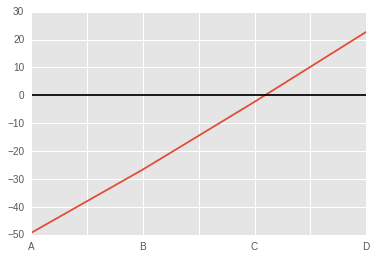

In [34]:
# plot the sum of the columns
df.sum().plot()
# draw a black horizontal line at zero
plt.axhline(0, color='k')

* This is a *bad* visualization, the line imply an ordered relationship between the four categories
* Let's use a bar chart instead

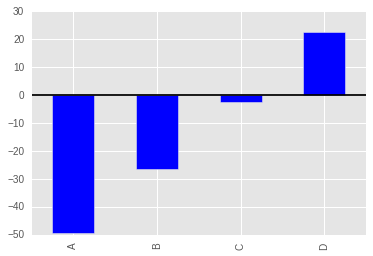

In [35]:
# plot the sum of the columns as bars
df.sum().plot(kind='bar')
# draw a black horizontal line 
# you can use Matplotlib to modify a pandas plot
plt.axhline(0, color='k')

* Lets re-create that bar chart of animal counts

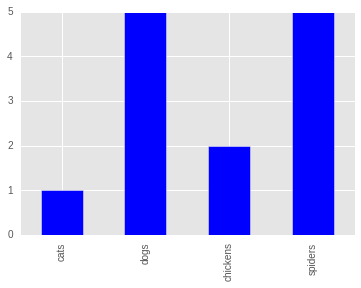

In [36]:
# Create a bar chart using the index as the category labels
pd.Series([1,5,2,5], index=["cats", "dogs", "chickens", "spiders"]).plot.bar()

* Almost got it, but the labels on the x axis are a bit wonky. 
* Let's look at the documentation and see if we can find a fix

#### Exercise

* Find the documentation for the `plot()` method of a Pandas `Series`
* What parameter will fix the x labels so they are easier to read?

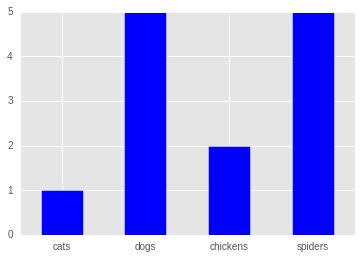

In [38]:
pd.Series([1,5,2,5], index=["cats", "dogs", "chickens", "spiders"]).plot(kind='bar',rot=0)


### Pandas Plot types

* Pandas provides a quick and easy interface to a bunch of different plot types
* You don't even have to load `matplotlib` (although you do need `%matplotlib inline`)
* So now we have *three* interfaces to `matplotlib`! I am sorry, it is confusing.
* The secret to plotting is googling, looking at other people's code, and trying things until it works
    * At least, that is how I do it


* What is nice about pandas/matplotlib integration is pandas will handle a lot of the boilerplate code for you
* Then you pass parameters to the `plot()` method to determine how the graph should look

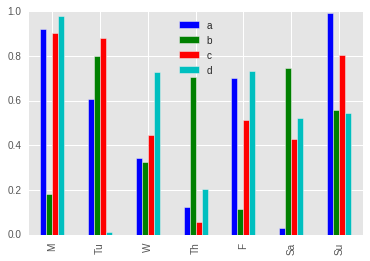

In [40]:
# create some random categorical data
df2 = pd.DataFrame(np.random.rand(7, 4), 
                   columns=['a', 'b', 'c', 'd'], 
                   index=["M","Tu","W","Th","F","Sa","Su",])

# Plot a bar chart
df2.plot(kind="bar")

* Bar charts can also be called directly using the `bar()` function 

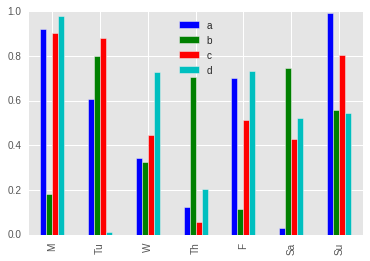

In [41]:

df2.plot.bar()

* There are a bunch of parameters for these methdos that let you tweak the vizualization
* For example, the `stacked` parameter stacks the categorical values so you can easily compare within and across categories

In [ ]:
df2.plot.bar(stacked=True)

* Try experimenting with the other plot types
* Do they make sense for these data?



In [ ]:
# move the cursor to the right of the period and hit tab
df2.plot.

In [ ]:
# try another plot type
# move the cursor to the right of the period and hit tab
df2.plot.

In [ ]:
# try another plot type
# move the cursor to the right of the period and hit tab
df2.plot.

### Formatting your plots 

* You can pass parameters to the `plot()` method
* Or you can set features through the `plt` interface


In [ ]:
# Add a title with the title parameter
df2.plot.bar(stacked=True, title="Things per day")

In [ ]:
# Same thing as above, but through the pyplot interface
df2.plot.bar(stacked=True)
plt.title("Letters per day")

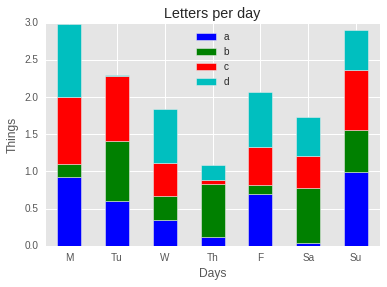

In [45]:
# some things are easier with pyplot, like tweaking x and y labels
df2.plot.bar(stacked=True, rot=0)
plt.title("Letters per day")
plt.xlabel("Days")
plt.ylabel("Things")

* Perhaps we want to make the y axis bigger, to give some headroom for the legend
* Or show how our things aren't living up to 5

In [ ]:
# modify the y axis to start at zero and go to five
df2.plot.bar(stacked=True, ylim=[0,5])
plt.title("Letters per day")
plt.xlabel("Days")
plt.ylabel("Things")

### Subplots

* Sometimes we don't want to show everything on one chart, so we can use subplots to show multiples

In [ ]:
df2.plot(subplots=True)

* Ok, but the y-ticks are a bit cramped!

In [ ]:
df2.plot(subplots=True, yticks=[0,.5,1.0])

#### Exercise

* This still doesn't quite look right, play with the `yticks` and `ylim` parameters to make a sensible looking plot


In [ ]:
# Your code here

### Styles

* To help with the overall aesthetic of your plots you can set different styles
* Some look better than others

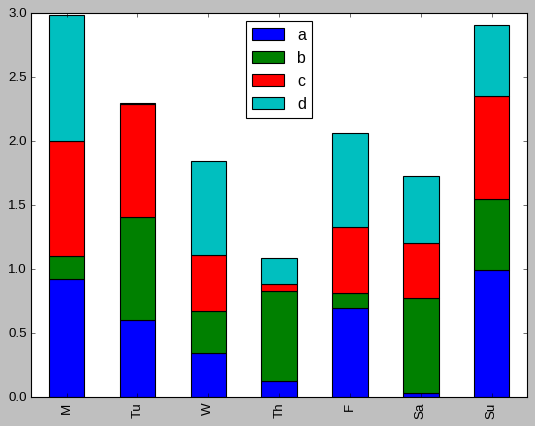

In [46]:
# This is what happens when scientists do visual design
plt.style.use('classic')
df2.plot.bar(stacked=True)

* There are a bunch of styles that ship with matplotlib

In [47]:
# look and see what styles are available
plt.style.available

['seaborn-poster',
 'seaborn-ticks',
 'seaborn-paper',
 'dark_background',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-deep',
 'seaborn-notebook',
 'seaborn-whitegrid',
 'seaborn-talk',
 'grayscale',
 'bmh',
 'seaborn-dark',
 'seaborn-pastel',
 'ggplot',
 'seaborn-darkgrid',
 'fivethirtyeight',
 'seaborn-muted',
 'classic',
 'seaborn-white']

#### Exercise

* Visualize `df2` using a couple different styles

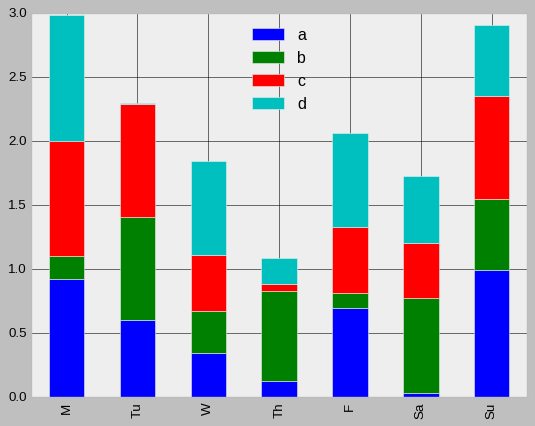

In [53]:
# Put your code here
plt.style.use("seaborn-deep")
df2.plot.bar(stacked=True)